# The Qiskit SDK

## Dependencies

In [1]:
# numpy
import numpy as np

# qiskit
import qiskit as qk
import qiskit.visualization as qkv

## Functions

In [2]:
# randmoize initial state
def random_init(qcirc, num_q):
    # generate random numbers from a uniform distribution
    r = np.random.uniform(size=num_q)
    for i in range(num_q):
        # coefficients of computational basis
        init_q  = [np.sqrt(r[i]), np.sqrt(1 - r[i])]
        # initialize i-th quantum state
        qcirc.initialize(init_q, i)

# apply controlled not 
def apply_waterfall(gate_func, qcirc, start, end):
    for i in range(start, end):
        getattr(qcirc, gate_func)(i, i + 1)

## Create Circuit

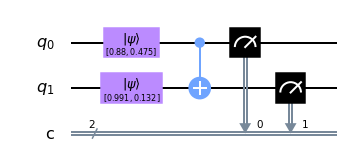

In [3]:
# parameters
num_q = 2                   # number of qbits
num_c = 2                   # number of cbits

# a quantum circuit comprising of num_q qbits and num_c cbits
qcirc = qk.QuantumCircuit(num_q, num_c)

# randomize initial states
random_init(qcirc, num_q)
# apply CX waterfall
apply_waterfall('cx', qcirc, 0, num_q - 1)
# measurement on the qubits
qcirc.measure(range(num_q), range(num_c))

# visualize the gate using matplotlib
qcirc.draw(output='mpl')


## Classical Simulation

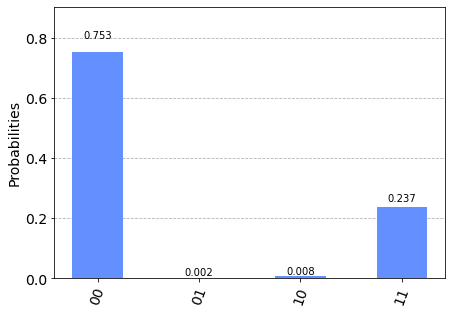

In [4]:
# get backend API for the noisy quantum simulator QASM
be = qk.Aer.get_backend('qasm_simulator')
# execute measurement
job = qk.execute(qcirc, backend=be)
# obtain measurement result
res = job.result()

# visualize result
qkv.plot_histogram(res.get_counts(qcirc))

## Quantum Computation

In [5]:
# load IBMQ API access token
qk.IBMQ.load_account()
# get backend providers for IBM Quantum
prov = qk.IBMQ.get_provider('ibm-q')
# print list of available backends
print(prov.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [6]:
# get backend API for the quantum computer
qcomp = prov.get_backend('ibmqx2')
# execute measurement
job = qk.execute(qcirc, backend=qcomp)
# get results
qk.tools.job_monitor(job)

Job Status: job has successfully run


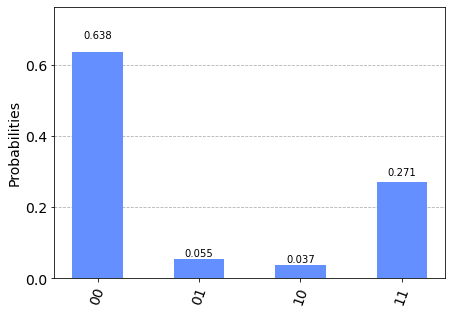

In [7]:
# obtain measurement results
res = job.result()

# visualize results
qkv.plot_histogram(res.get_counts(qcirc))